In [1]:
import os, types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

client_6d605a1dc2734d049ac982d9926a9c5f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hiqF6XoYxa3RqPSrmLcg2rSrzc33PT4wxlapQnR7e4Ul',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

data = client_6d605a1dc2734d049ac982d9926a9c5f.get_object(Bucket='codingexercisedodotechnologies-donotdelete-pr-jdfbjgunmtqr5p',Key='house-prices.csv')['Body']

df = pd.read_csv(data)
df.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


# Question 1

How many instances are there?

In [2]:
df.shape[0]

128

# Answer 1

There are 128 instances.

<br>

# Question 2

How many attributes are there?

In [3]:
df.shape[1]

8

# Answer 2

There are 8 attributes.

<br>

# Question 3

What are the names of the attributes?

In [4]:
for col_name in df.columns: 
    print(col_name)

HomeID
Price
SqFt
Bedrooms
Bathrooms
Offers
Brick
Neighborhood


# Answer 3

The names of the attributes are: HomeID, Price, SqFt, Bedrooms, Bathrooms, Offers, Brick, Neighborhood.

<br>

# Question 4

What are the data types of the attributes?

In [5]:
for data_types in df.dtypes: 
    print(data_types)

int64
int64
int64
int64
int64
int64
object
object


# Answer 4

The data types of the attributes are: int64, int64, int64, int64, int64, int64, object, object

<br>

# Question 5

A function that returns the squared difference between two numeric scalars

In [6]:
def num_sqr_diff(v0, v1):
    d = (v0 - v1)**2
    return d

<br>

# Question 6

A function that returns the distance between two nominal scalars

In [7]:
def nom_dist(v0, v1):
    if(v0 == v1):
     d = 0
     return d
    else:
     d = 1
     return d

<b>

# Question 7

A function that computes the Euclidean distance between two instances, X0 and X1, by taking the square root of the sum of the distances between each attribute value

In [8]:
from math import hypot

def euc_distance(p1,p2):
    a1, b1, c1, d1, e1, f1, g1 = p1
    a2, b2, c2, d2, e2, f2, g2 = p2
    return hypot(a1 - a2, b1 - b2, c1 - c2, d1 - d2, e1 - e2, f1 - f2, g1 - g2)

<br>

# Question 8

Now use your distance functions to compute the pairwise distance between all instances in the data set

In [9]:
df_copy = df.copy(deep=True)

In [10]:
df_copy.drop("HomeID", axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df_copy['Brick'] = le.fit_transform(df_copy['Brick'])

In [14]:
df_copy['Neighborhood'] = le.fit_transform(df_copy['Neighborhood'])

In [15]:
row_list = []
  
for rows in df_copy.itertuples():
    my_list = [rows.Price, rows.SqFt, rows.Bedrooms, rows.Bathrooms, rows.Offers, rows.Brick, rows.Neighborhood]
    row_list.append(my_list)

In [16]:
from itertools import combinations
euc_distance_list = [euc_distance(*combo) for combo in combinations(row_list, 2)]

In [17]:
euc_distance_list

[260.00961520682273,
 502.49577112648427,
 19600.920947751405,
 5510.499342164919,
 300.1699518606084,
 37300.021554953564,
 36401.88055581744,
 4910.438371469497,
 10300.174901427645,
 18201.582431206356,
 8700.367865785905,
 11700.61562482932,
 12005.399326969511,
 62505.11989429346,
 31500.00173015868,
 32802.439040412835,
 30700.65157289011,
 2901.396560279204,
 52900.15980127093,
 1900.0005263157166,
 542.3154063826695,
 22600.221304226205,
 8200.05512176595,
 42102.09503100766,
 35003.57134636407,
 22700.97154308599,
 15000.270030902779,
 45200.399356642854,
 73700.42408968892,
 67701.56284015901,
 2004.894510940663,
 20705.110576860003,
 25304.744910786987,
 3506.294625384467,
 2814.9785079108506,
 3201.2655310048863,
 32706.06844302751,
 17000.144293505276,
 6100.205078519902,
 7703.434363970397,
 19300.064999890546,
 8702.29860439183,
 39700.21288356021,
 52200.21558384602,
 11100.018108093338,
 15501.29033338838,
 24001.408666992862,
 1611.241757155021,
 6800.595856246716,
 3

In [18]:
max(euc_distance_list)

142102.48276156193

### The maximum distance of the Euclidean distances is 142102.48

<br>

# Question 9

A function that returns the absolute value of the difference between two numeric scalars

In [19]:
def num_abs_diff(v0, v1):
    d = abs(v0 - v1)
    return d

<br>

# Question 10

A function that computes the Manhattan distance between two instances, X0 and X1, by taking the sum of the distances between each attribute value

In [20]:
def man_distance(p1, p2):
    a1, b1, c1, d1, e1, f1, g1 = p1
    a2, b2, c2, d2, e2, f2, g2 = p2
    return abs(a1 - a2) + abs(b1 - b2) + abs(c1 - c2) + abs(d1 - d2) + abs(e1 - e2) + abs(f1 - f2) + abs(g1 - g2)

<br>

# Question 11

Extend your code to compute the Manhattan distance between instances

In [21]:
man_distance_list = [man_distance(*combo) for combo in combinations(row_list, 2)]

In [22]:
man_distance_list

[343,
 552,
 19792,
 5843,
 312,
 37346,
 36774,
 5223,
 10363,
 18443,
 8781,
 11824,
 12367,
 63307,
 31515,
 33205,
 30905,
 2992,
 53035,
 1902,
 714,
 22703,
 8234,
 42524,
 35505,
 22915,
 15091,
 45392,
 73957,
 68167,
 2142,
 21164,
 25797,
 3712,
 3094,
 3291,
 33337,
 17074,
 6152,
 7931,
 19355,
 8901,
 39833,
 52355,
 11122,
 15702,
 24266,
 1790,
 6894,
 37113,
 23272,
 3464,
 16813,
 33143,
 11471,
 27003,
 38456,
 23855,
 41405,
 67015,
 13581,
 47435,
 6321,
 16073,
 3543,
 12325,
 37854,
 21054,
 51596,
 52566,
 43675,
 7143,
 11652,
 30255,
 7511,
 15643,
 62697,
 7343,
 29315,
 29505,
 70356,
 50764,
 34022,
 24072,
 74466,
 11715,
 58296,
 13543,
 16723,
 28934,
 2561,
 28623,
 43092,
 46667,
 38384,
 19653,
 12712,
 31474,
 56995,
 11325,
 9275,
 23124,
 97557,
 32123,
 33347,
 6144,
 19803,
 2904,
 5922,
 2782,
 651,
 9451,
 1614,
 10423,
 11914,
 85709,
 3632,
 36064,
 4733,
 4043,
 8843,
 30772,
 5514,
 33975,
 1081,
 35835,
 10765,
 893,
 19551,
 5702,
 653,
 3

In [23]:
max(man_distance_list)

142945

### The maximum distance of the Manhattan distances is 142945

<br>

# Question 12

Find the 5 nearest neighbours to your desired house. Compute the average price of those neighbours to give yourself an idea of how much you would have to spend for this house.

In [24]:
x_train = df_copy[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']].values

In [25]:
y = df_copy[['Price']].values

In [26]:
x_input = [{'SqFt': 2050, 'Bedrooms': 2, 'Bathrooms': 1, 'Offers': 2, 'Brick': 0, 'Neighborhood': 0}]
x_input = pd.DataFrame.from_dict(x_input).values

In [27]:
def eucledian_distance(p1,p2):
    d = np.sqrt(np.sum((p1-p2)**2))
    return d

In [28]:
def predict(x_train, y , x_input, k):
    price_labels = []
    for item in x_input:
        point_dist = []
        for j in range(len(x_train)): 
            distances = eucledian_distance(np.array(x_train[j, :]), item)
            point_dist.append(distances) 
        point_dist = np.array(point_dist)
        d = np.argsort(point_dist)[:k] 
        labels = y[d]
        price_labels.append(labels)
        return price_labels

In [29]:
predict(x_train, y, x_input, 5)

[array([[164800],
        [ 90300],
        [144800],
        [125700],
        [145500]])]

In [30]:
average_price = (164800 + 90300 + 144800 + 125700 + 145500) / 5
average_price

134220.0

### The average price of the 5 neighbors is 134220

<br>

# Question 13

Build a K-Nearest Neighbours Model with Euclidean metric

In [31]:
X = df_copy.values

In [32]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=128, algorithm='kd_tree', metric='euclidean')
nn.fit(X)
euc_dist, ind = nn.kneighbors(X, return_distance=True)

In [33]:
euc_dist

array([[    0.        ,   260.00961521,   300.16995186, ...,
        74001.42978348, 85201.46723502, 96902.18011479],
       [    0.        ,   260.00961521,   401.12716188, ...,
        74100.32663221, 85300.39632968, 97000.8665219 ],
       [    0.        ,   100.01499888,   203.96568339, ...,
        73501.76942088, 84701.7857722 , 96402.54151733],
       ...,
       [    0.        ,   308.06655125,   701.14620444, ...,
        74800.21662402, 86000.28148791, 97700.70065255],
       [    0.        ,   308.06979729,   657.95592558, ...,
        67600.08960053, 68600.99784989, 80801.0916201 ],
       [    0.        ,   260.01153821,  1046.95176584, ...,
        63700.00005495, 74900.01078772, 86600.20845241]])

In [34]:
np.amin(euc_dist)

0.0

### The minimum distance of the Euclidean distances is 0.0

In [35]:
np.amax(euc_dist)

142102.4827615619

### The maximum distance of the Euclidean distances is 142102.48

<br>

# Question 14

Build a K-Nearest Neighbours Model with Manhattan metric

In [36]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=128, algorithm='kd_tree', metric='manhattan')
nn.fit(X)
man_dist, ind = nn.kneighbors(X, return_distance=True)

In [37]:
man_dist

array([[    0.,   312.,   343., ..., 74466., 85709., 97557.],
       [    0.,   343.,   433., ..., 74325., 85568., 97414.],
       [    0.,   103.,   242., ..., 74016., 85257., 97107.],
       ...,
       [    0.,   373.,   744., ..., 74985., 86228., 98076.],
       [    0.,   375.,   874., ..., 67716., 68974., 81225.],
       [    0.,   344.,  1313., ..., 63705., 74948., 86794.]])

In [38]:
np.amin(man_dist)

0.0

### The minimum distance of the Manhattan distances is 0.0

In [40]:
np.amax(man_dist)

142945.0

### The maximum distance of the Manhattan distances is 142945.0

<br>

In [41]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_copy)) #scaling the data
scaled_data

,0,1,2,3,4,5,6
0,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,-0.698836,-1.178538
1,-0.606321,0.137904,1.350503,-0.868939,0.396075,-0.698836,-1.178538
2,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,-0.698836,-1.178538
3,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,-0.698836,-1.178538
4,-0.397082,0.612413,-0.032412,1.082362,0.396075,-0.698836,-1.178538
...,...,...,...,...,...,...,...
123,-0.400818,-0.478957,-0.032412,1.082362,0.396075,1.430950,-1.178538
124,0.652851,0.754765,1.350503,1.082362,0.396075,1.430950,-1.178538
125,-0.632476,0.327707,-1.415327,-0.868939,-0.542769,-0.698836,0.057961
126,0.727580,0.090453,-0.032412,1.082362,-1.481614,-0.698836,1.294459


In [42]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-2.269895,-0.359102
1,-0.533710,1.127759
2,-1.762844,-0.937076
3,-1.638453,1.063322
4,0.036369,1.410071


<AxesSubplot:>

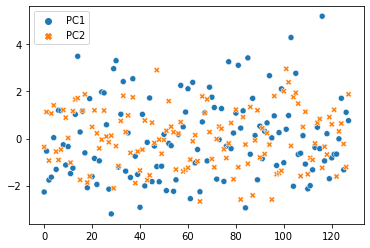

In [43]:
import seaborn as sns
sns.scatterplot(data=data_pca)